In [1]:
import itertools
import pandas as pd

data = pd.concat((pd.read_csv("./per_frame_delay.csv"), pd.read_csv("./per_frame_delay_high_corr.csv"), pd.read_csv("./per_frame_delay_new_runs.csv")))
# models = pd.CategoricalDtype(["curve-low", "curve-high", "legacy", "first-order", "first-order-median"], ordered=False)
# data["model"] = data["model"].astype(models)
data = data[data["rho"] < 0.6]
data = data[data["sigma"] < 3.2]

rho_sigma_dtype = pd.CategoricalDtype(map(lambda t: f"{t[0]} {t[1]}", itertools.product(sorted(data["rho"].unique()), sorted(data["sigma"].unique()))), ordered=True)

data["rho"] = data["rho"].astype("category")
data["sigma"] = data["sigma"].astype("category")


data["rho_sigma"] = data[["rho", "sigma"]].apply(func=lambda row: f"{row.rho} {row.sigma}", axis=1).astype(rho_sigma_dtype)
data["model"] = data["model"].replace({
    "first-order": "Ref. Stochastic",
    "first-order-median": "Ref. Median",
    "curve-low": "3rd Order Poly. (low neuroticism)",
    "curve-high": "3rd Order Poly. (high neuroticism)",
    "legacy": "Legacy EdgeDroid 1.0"
}).astype("category")
data

,step_number,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,model,rep,rho,sigma,rho_sigma
0,0,0.143041,0.000000,0.143041,0.143041,0.000000,1,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1
1,1,0.201519,5.004304,5.333957,0.329653,0.128135,33,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1
2,2,0.143975,5.072477,5.222050,0.149573,0.005599,32,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1
3,3,0.067107,5.006894,5.083496,0.076602,0.009495,27,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1
4,4,0.140907,4.585061,4.731451,0.146390,0.005483,33,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
152230,46,4.397632,5.230947,13.015823,7.784876,3.387244,4,Ref. Median,29,0.5,1.6,0.5 1.6
152231,47,3.774478,5.230947,11.999823,6.768876,2.994399,3,Ref. Median,29,0.5,1.6,0.5 1.6
152232,48,3.199172,5.230947,8.991891,3.760944,0.561772,3,Ref. Median,29,0.5,1.6,0.5 1.6
152233,49,2.747137,5.230947,8.602955,3.372008,0.624871,3,Ref. Median,29,0.5,1.6,0.5 1.6


In [2]:
total_durations = data.groupby(["model", "rep", "rho", "sigma", "rho_sigma"], observed=True)["step_duration"].sum().reset_index()
total_durations

,model,rep,rho,sigma,rho_sigma,step_duration
0,3rd Order Poly. (high neuroticism),0,0.0,0.1,0.0 0.1,213.669584
1,3rd Order Poly. (high neuroticism),0,0.0,0.2,0.0 0.2,235.053415
2,3rd Order Poly. (high neuroticism),0,0.0,0.4,0.0 0.4,303.845079
3,3rd Order Poly. (high neuroticism),0,0.0,0.8,0.0 0.8,356.731061
4,3rd Order Poly. (high neuroticism),0,0.0,1.6,0.0 1.6,474.719026
...,...,...,...,...,...,...
2245,Ref. Stochastic,29,0.5,0.1,0.5 0.1,282.376243
2246,Ref. Stochastic,29,0.5,0.2,0.5 0.2,339.292417
2247,Ref. Stochastic,29,0.5,0.4,0.5 0.4,370.627170
2248,Ref. Stochastic,29,0.5,0.8,0.5 0.8,411.536682


mean duration


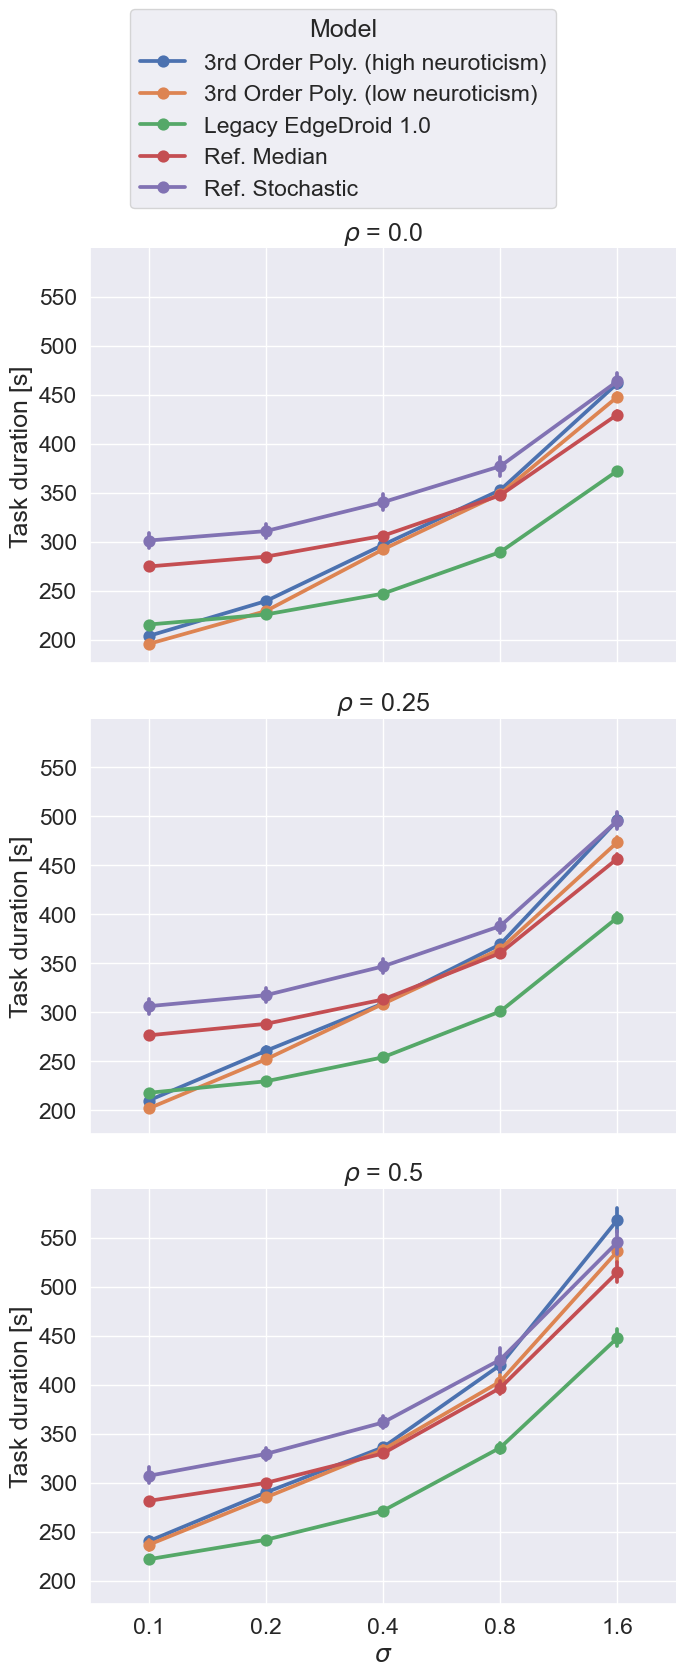

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set(font_scale=1.5)
DOUBLE_COL_FIGW = 7.16

print("mean duration")
fg = sns.catplot(kind="point", data=total_durations, hue="model", y="step_duration", x="sigma", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"$\sigma$", "Task duration [s]")
fg.set_titles(row_template=r"$\rho$ = {row_name}")
# fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*7.5))
fg.tight_layout()
plt.show()

# push correlation higher

In [38]:
mean_total_durations = (
    total_durations
    .groupby(["model", "rho", "sigma"])["step_duration"]
    .mean()
    .reset_index()
)

min_sigma = mean_total_durations[mean_total_durations.sigma == mean_total_durations.sigma.astype(float).min()].drop(columns=["sigma"]).set_index(["model", "rho"])["step_duration"].astype(float)
max_sigma = mean_total_durations[mean_total_durations.sigma == mean_total_durations.sigma.astype(float).max()].drop(columns=["sigma"]).set_index(["model", "rho"])["step_duration"].astype(float)

((max_sigma - min_sigma) / min_sigma).sort_values(ascending=False)

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_63820/1471214629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["model", "rho", "sigma"])["step_duration"]


model                               rho 
3rd Order Poly. (high neuroticism)  0.50    1.364153
                                    0.25    1.361622
3rd Order Poly. (low neuroticism)   0.25    1.345614
                                    0.00    1.286848
                                    0.50    1.265146
3rd Order Poly. (high neuroticism)  0.00    1.263452
Legacy EdgeDroid 1.0                0.50    1.017827
Ref. Median                         0.50    0.828794
Legacy EdgeDroid 1.0                0.25    0.820308
Ref. Stochastic                     0.50    0.776359
Legacy EdgeDroid 1.0                0.00    0.727083
Ref. Median                         0.25    0.651988
Ref. Stochastic                     0.25    0.617705
Ref. Median                         0.00    0.563922
Ref. Stochastic                     0.00    0.539244
Name: step_duration, dtype: float64

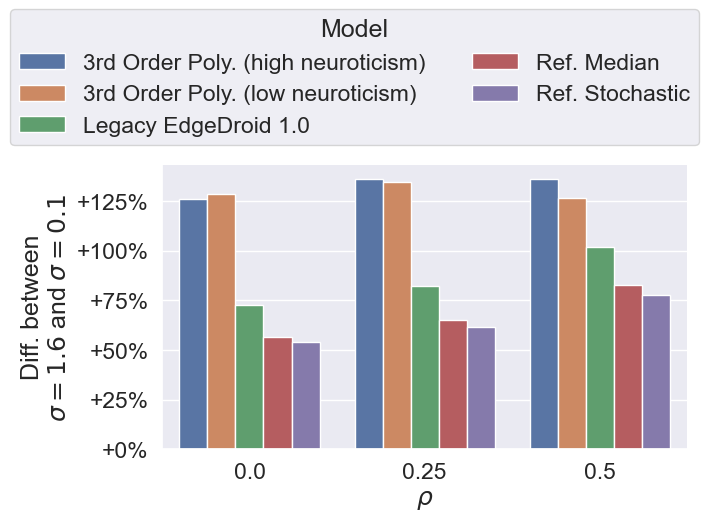

In [55]:
sns.set_context("paper")
sns.set(font_scale=1.5)

duration_increase = ((max_sigma - min_sigma) / min_sigma).reset_index()
fg = sns.catplot(kind="bar", data=duration_increase, x="rho", hue="model", y="step_duration", legend_out=False)
fg.set_axis_labels(r"$\rho$", "Diff. between\n" r"$\sigma = 1.6$ and $\sigma = 0.1$")

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter("{x:+.0%}")

sns.move_legend(fg, "upper center", title="Model", bbox_to_anchor=(.5, 1.35), ncols=2)
fg.figure.set_size_inches((2*3.6, 2*2))
fg.tight_layout()
plt.show()

mean number of frames


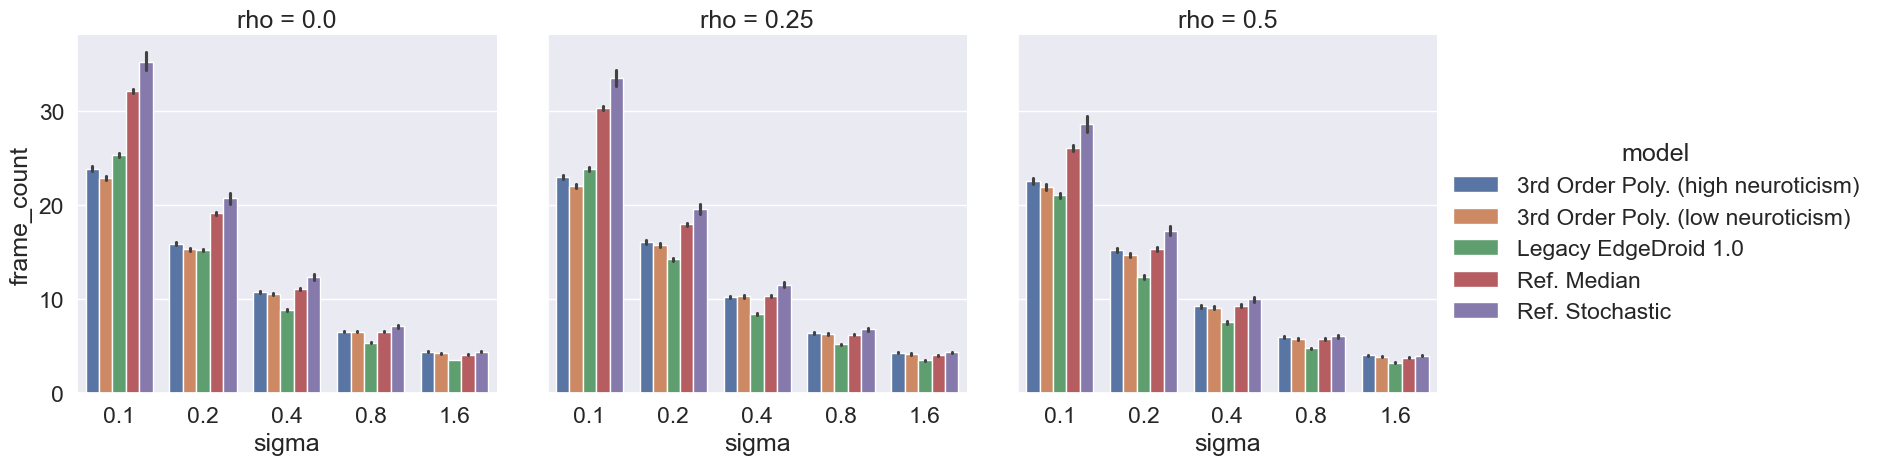

In [4]:
print("mean number of frames")
fg = sns.catplot(kind="bar", data=data, y="frame_count", hue="model", x="sigma", col="rho")
plt.show()

mean TTF


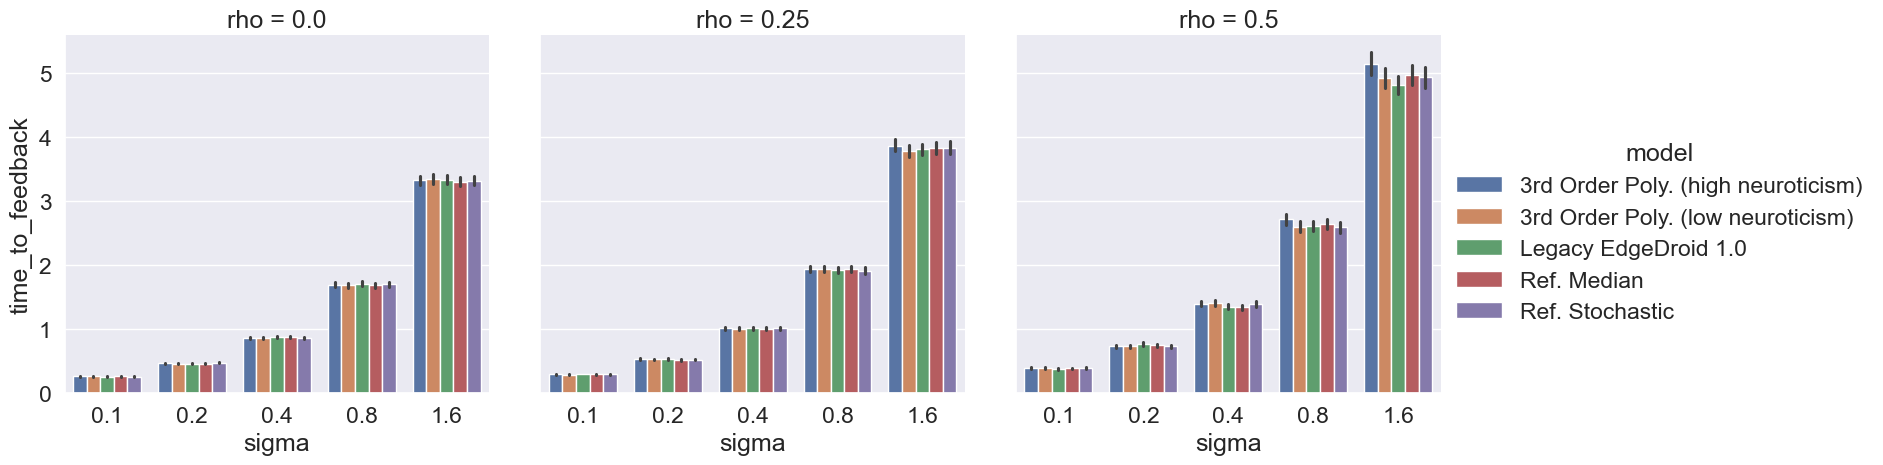

In [5]:
print("mean TTF")
fg = sns.catplot(kind="bar", data=data, hue="model", y="time_to_feedback", x="sigma", col="rho")
plt.show()

mean wait time


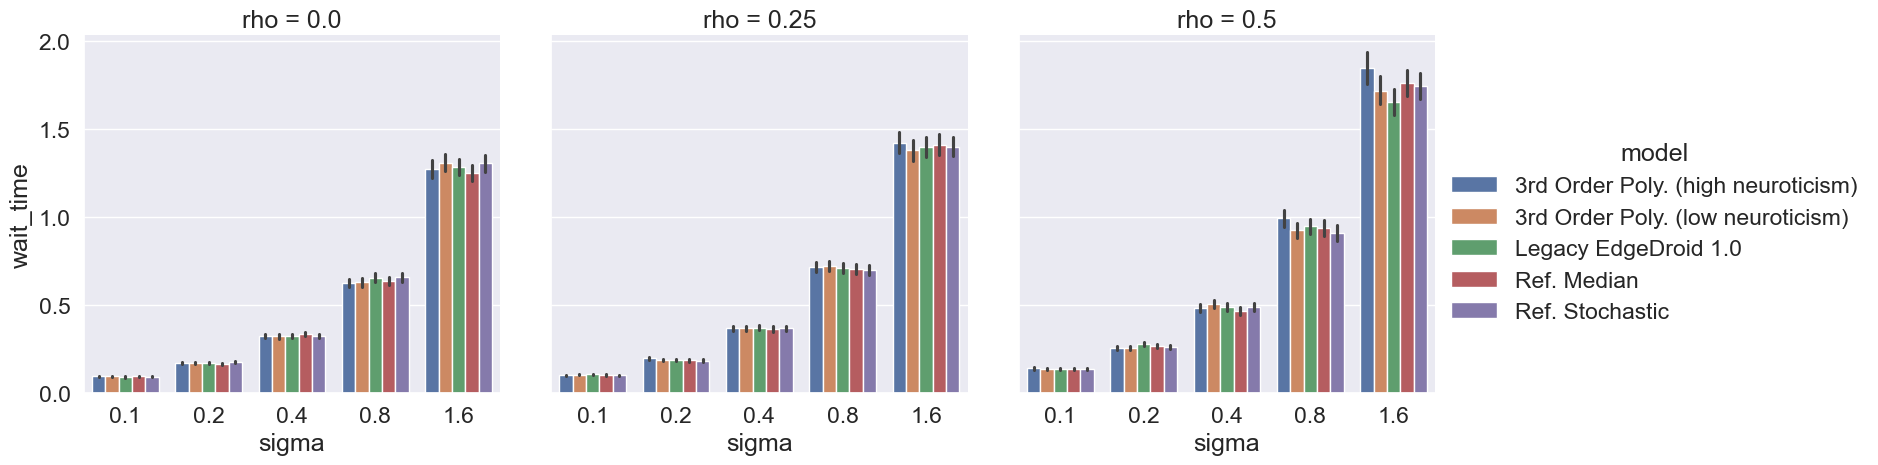

In [6]:
print("mean wait time")
fg = sns.catplot(kind="bar", data=data, hue="model", y="wait_time", x="sigma", col="rho")
plt.show()

mean last frame rtt


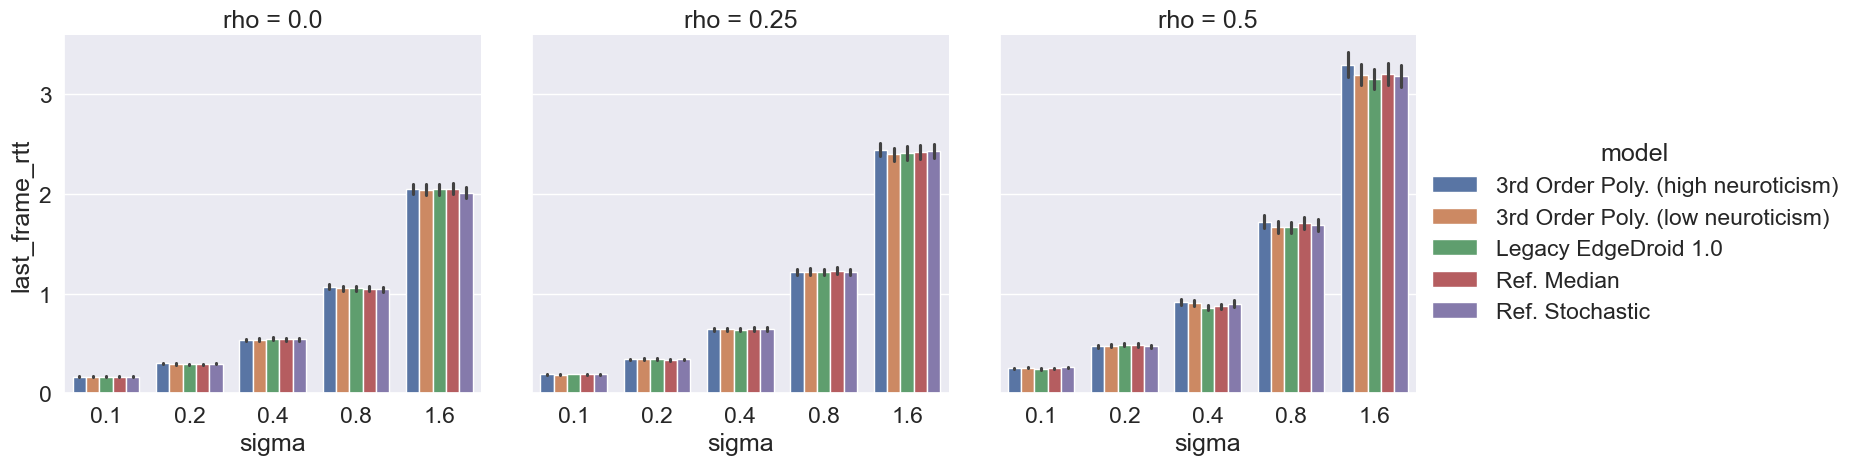

In [7]:
print("mean last frame rtt")
fg = sns.catplot(kind="bar", data=data, hue="model", y="last_frame_rtt", x="sigma", col="rho")
plt.show()

In [8]:
data["rep"].max()

29

In [9]:
b

NameError: name 'b' is not defined